## Section 2: Shopper Analytics - Customer Segmentation & Category Associations

- Dataset

#### Transaction Level Data 

<table align = "left">
    <tr>
        <th>sales_receipt</th>
        <th>sales_customer</th>
        <th>sales_product</th>
        <th>sales_date_id</th>
    </tr>
    <tr>
        <th>Receipt ID</th>
        <th>Customer ID</th>
        <th>Product ID</th>
        <th>Date ID</th>
    </tr>
</table>

#### Product Master Data

<table align = "left">
    <tr>
        <th>product_id</th>
        <th>product_lvl1_cat_desc</th>
        <th>product_lvl2_cat_desc</th>
    </tr>
    <tr >
        <th>Product ID</th>
        <th>Category Level 1</th>
        <th>Category Level 2</th>
    </tr>
</table>



#### Requirement

1. Arrange customers into mutually exclusive groups and describe the customers clusters. Code libraries are allowed for this section of the code

In [97]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [4]:
%matplotlib inline

In [5]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'Data Science Internship - Case Study.pdf',
 'Emporio Assesment 2.ipynb',
 'emporio-assessment.ipynb',
 'README.md',
 's1_product_dimensions.csv',
 's1_transaction_data.csv',
 's2_product_master.csv',
 's2_transaction_data.csv']

In [56]:
df1 = pd.DataFrame(pd.read_csv('s2_transaction_data.csv'))

In [57]:
df2 = pd.DataFrame(pd.read_csv('s2_product_master.csv'))

In [58]:
df1 = df1.drop(columns = df1.columns[0])

In [59]:
df1

,sales_receipt,sales_customer,sales_product,sales_date_id
0,203722145,569,30763,20180102
1,203722145,569,112415,20180102
2,203722145,569,49480,20180102
3,203722145,569,130287,20180102
4,203722145,569,68306,20180102
...,...,...,...,...
49995,205776308,515,11174,20180914
49996,205776308,515,23356,20180914
49997,205776308,515,103770,20180914
49998,205776308,515,20366,20180914


In [60]:
# change dtype
df1.loc[:, 'sales_date_id'] = pd.to_datetime(df1.loc[:,'sales_date_id'], format = '%Y%m%d').copy()

In [61]:
df1

,sales_receipt,sales_customer,sales_product,sales_date_id
0,203722145,569,30763,2018-01-02
1,203722145,569,112415,2018-01-02
2,203722145,569,49480,2018-01-02
3,203722145,569,130287,2018-01-02
4,203722145,569,68306,2018-01-02
...,...,...,...,...
49995,205776308,515,11174,2018-09-14
49996,205776308,515,23356,2018-09-14
49997,205776308,515,103770,2018-09-14
49998,205776308,515,20366,2018-09-14


In [62]:
df2 = df2.drop(columns = df2.columns[0])

In [83]:
df2

,product_id,product_lvl1_cat_desc,product_lvl2_cat_desc
0,265,Alcohol,Beer
1,1255,Alcohol,Beer
2,2425,Alcohol,Beer
3,4343,Alcohol,Beer
4,4709,Alcohol,Beer
...,...,...,...
10743,53829,PetCare,SmallAnimals
10744,62622,PetCare,SmallAnimals
10745,66107,PetCare,SmallAnimals
10746,69773,PetCare,SmallAnimals


Join the tables

In [240]:
maindf1 = df1.join(df2.set_index('product_id'), how = 'inner',on='sales_product')

In [241]:
maindf1

,sales_receipt,sales_customer,sales_product,sales_date_id,product_lvl1_cat_desc,product_lvl2_cat_desc
0,203722145,569,30763,2018-01-02,FoodCommodity,JarredFood
5519,203960181,358,30763,2018-02-01,FoodCommodity,JarredFood
9015,204115623,358,30763,2018-02-22,FoodCommodity,JarredFood
10543,204158417,569,30763,2018-02-28,FoodCommodity,JarredFood
10832,204168017,358,30763,2018-03-01,FoodCommodity,JarredFood
...,...,...,...,...,...,...
49943,205774052,358,232498,2018-09-14,BabyAndChild,BabyPersonal
49960,205774491,11,121742,2018-09-14,Frozen,Desserts
49961,205774491,11,121743,2018-09-14,Frozen,Desserts
49977,205776025,396,176415,2018-09-14,FoodCommodity,CookingSaucesAndKits


In [242]:
# check for na 
maindf1.dropna()

,sales_receipt,sales_customer,sales_product,sales_date_id,product_lvl1_cat_desc,product_lvl2_cat_desc
0,203722145,569,30763,2018-01-02,FoodCommodity,JarredFood
5519,203960181,358,30763,2018-02-01,FoodCommodity,JarredFood
9015,204115623,358,30763,2018-02-22,FoodCommodity,JarredFood
10543,204158417,569,30763,2018-02-28,FoodCommodity,JarredFood
10832,204168017,358,30763,2018-03-01,FoodCommodity,JarredFood
...,...,...,...,...,...,...
49943,205774052,358,232498,2018-09-14,BabyAndChild,BabyPersonal
49960,205774491,11,121742,2018-09-14,Frozen,Desserts
49961,205774491,11,121743,2018-09-14,Frozen,Desserts
49977,205776025,396,176415,2018-09-14,FoodCommodity,CookingSaucesAndKits


In [243]:
maindf1 = maindf1.reset_index().copy()

In [210]:
maindf2 = maindf1.set_index(['product_lvl1_cat_desc','product_lvl2_cat_desc', 'sales_date_id',
                            'sales_customer']).sort_index()
# maindf2.drop(columns = 'index').loc[pd.IndexSlice['Alcohol',:,'2018-01-02':'2018-01-10'],
#                                    ['sales_receipt','sales_customer']] #trying index slicing

In [211]:
maindf2

index  \
product_lvl1_cat_desc product_lvl2_cat_desc sales_date_id sales_customer          
Alcohol               Beer                  2018-01-02    70                 55   
                                                          654               103   
                                            2018-01-03    168               139   
                                                          168               140   
                                            2018-01-06    70                708   
...                                                                         ...   
PetCare               SmallAnimals          2018-05-27    525             27673   
                                            2018-05-31    170             28370   
                                            2018-07-06    577             35249   
                                                          577             35250   
                                            2018-07-27    525             39085   

                                                                          sales_receipt  \
product_lvl1_cat_desc product_lvl2_cat_desc sales_date_id sales_customer                  
Alcohol               Beer                  2018-01-02    70                  203723509   
                                                          654                 203725447   
                                            2018-01-03    168                 203728976   
                                                          168                 203728976   
                                            2018-01-06    70                  203753735   
...                                                                                 ...   
PetCare               SmallAnimals          2018-05-27    525                 204842228   
                                            2018-05-31    170                 204871629   
                                            2018-07-06    577                 205161284   
                                                          577                 205161284   
                                            2018-07-27    525                 205333968   

                                                                          sales_product  
product_lvl1_cat_desc product_lvl2_cat_desc sales_date_id sales_customer                 
Alcohol               Beer                  2018-01-02    70                      78592  
                                                          654                      9940  
                                            2018-01-03    168                     28342  
                                                          168                     28342  
                                            2018-01-06    70                      78821  
...                                                                                 ...  
PetCare               SmallAnimals          2018-05-27    525                     10026  
                                            2018-05-31    170                     62622  
                                            2018-07-06    577                     69773  
                                                          577                     53829  
                                            2018-07-27    525                     16023  

[50000 rows x 3 columns]

Check if the pair (sales_receipt, sales_customer) has unique entries, then we can drop one of them, as we can use the sales_date_id as the unique identifier

In [186]:
maindf1.set_index(['sales_receipt', 'sales_customer']).sort_index()

index  sales_product sales_date_id  \
sales_receipt sales_customer                                       
203722145     569                 0          30763    2018-01-02   
              569                 1         112415    2018-01-02   
              569                 2          49480    2018-01-02   
              569                 3         130287    2018-01-02   
              569                 4          68306    2018-01-02   
...                             ...            ...           ...   
205776308     515             49989           5211    2018-09-14   
              515             49987          55154    2018-09-14   
              515             49993         127610    2018-09-14   
              515             49992            232    2018-09-14   
              515             49991          83714    2018-09-14   

                             product_lvl1_cat_desc   product_lvl2_cat_desc  
sales_receipt sales_customer                                                
203722145     569                    FoodCommodity              JarredFood  
              569                     BabyAndChild            ToysLearning  
              569                           Frozen  BreadBagelsandPancakes  
              569                     FreshProduce          TropicalFruits  
              569                     BabyAndChild            BabyPersonal  
...                                            ...                     ...  
205776308     515                        Household                   Paper  
              515                     FreshProduce               Mushrooms  
              515                     FreshProduce                  Salads  
              515                           Frozen           FrozenSeafood  
              515                        Beverages              SoftDrinks  

[50000 rows x 5 columns]

In [193]:
maindf1.drop_duplicates(subset=['sales_receipt','sales_customer']).shape

(3518, 7)

In [196]:
maindf1.groupby('sales_receipt')['sales_customer'].nunique().sum()

3518

Both returned the same number of rows, which means that sales receipt and sales customer is a one to one relationship

In [212]:
maindf2 = maindf2.drop(columns = ['index','sales_receipt']).copy()

In [219]:
maindf2.

sales_product
product_lvl1_cat_desc product_lvl2_cat_desc sales_date_id sales_customer               
Alcohol               Beer                  2018-01-02    70                      78592
                                                          654                      9940
                                            2018-01-03    168                     28342
                                                          168                     28342
                                            2018-01-06    70                      78821
...                                                                                 ...
PetCare               SmallAnimals          2018-05-27    525                     10026
                                            2018-05-31    170                     62622
                                            2018-07-06    577                     69773
                                                          577                     53829
                                            2018-07-27    525                     16023

[50000 rows x 1 columns]

In [232]:
maindf1.set_index(['sales_customer','product_lvl1_cat_desc','product_lvl2_cat_desc', 
                   'sales_date_id']).sort_index().drop(columns = ['index','sales_receipt'])

sales_product
sales_customer product_lvl1_cat_desc product_lvl2_cat_desc sales_date_id               
1              Alcohol               Beer                  2018-05-09            167849
               Beverages             HotDrinks             2018-05-09            193357
                                                           2018-05-09             95212
                                                           2018-05-09            193358
                                     LongLifeJuice         2018-05-09             47046
...                                                                                 ...
728            Household             Paper                 2018-02-05             94786
                                                           2018-04-01             30131
                                                           2018-04-13             30131
                                                           2018-04-27             36299
                                                           2018-04-27             30131

[50000 rows x 1 columns]

In [230]:
maindf1[['sales_date_id','sales_product']].set_index(['sales_date_id']).sort_index()

,sales_product
sales_date_id,
2018-01-02,30763
2018-01-02,82201
2018-01-02,54140
2018-01-02,92098
2018-01-02,28850
...,...
2018-09-14,20366
2018-09-14,66726
2018-09-14,36804


Get the quantity purchased of each sales_product at each sale, might have to create a new dataframe to merge

In [95]:
# EDA

In [129]:
## Time period
pd.DataFrame({'max' : [maindf1['sales_date_id'].max()] , 'min':[maindf1['sales_date_id'].min()],
              'days':[(maindf1['sales_date_id'].max()-maindf1['sales_date_id'].min()).days]}, index = ['duration']) 
# data collected over a period of 255 days

,max,min,days
duration,2018-09-14,2018-01-02,255


In [220]:
pd.DataFrame({'sales_customer_total_unique':[len(maindf1['sales_customer'].unique())],
              'sales_product_total_unique':[len(maindf1['sales_product'].unique())],
              'product_lvl1_cat_desc_total_unique':[len(maindf1['product_lvl1_cat_desc'].unique())],
              'product_lvl2_cat_desc_total_unique':[len(maindf1['product_lvl2_cat_desc'].unique())]}, index=['Count']).T

,Count
sales_customer_total_unique,303
sales_product_total_unique,10748
product_lvl1_cat_desc_total_unique,15
product_lvl2_cat_desc_total_unique,106


### Methodology 

Create customer segmentation by clustering

#### Preprocessing

- Encode features as dummy variables, use one-hot encoding
- Run dimensionality reduction on the feature matrix
- Run several clustering algorithms
- Select best model



### Encoding

In [245]:
maindf1 = maindf1.drop(columns = ['index', 'sales_receipt', 'sales_product']).copy() # sales product dropped to reduce dimensions

In [246]:
maindf1

,sales_customer,sales_date_id,product_lvl1_cat_desc,product_lvl2_cat_desc
0,569,2018-01-02,FoodCommodity,JarredFood
1,358,2018-02-01,FoodCommodity,JarredFood
2,358,2018-02-22,FoodCommodity,JarredFood
3,569,2018-02-28,FoodCommodity,JarredFood
4,358,2018-03-01,FoodCommodity,JarredFood
...,...,...,...,...
49995,358,2018-09-14,BabyAndChild,BabyPersonal
49996,11,2018-09-14,Frozen,Desserts
49997,11,2018-09-14,Frozen,Desserts
49998,396,2018-09-14,FoodCommodity,CookingSaucesAndKits


In [257]:
print(sorted(maindf1['sales_customer'].unique()))

[1, 2, 6, 7, 8, 11, 14, 15, 16, 18, 19, 22, 23, 24, 26, 27, 28, 30, 35, 36, 40, 41, 44, 48, 55, 56, 58, 59, 62, 65, 68, 70, 72, 73, 74, 78, 79, 83, 84, 85, 87, 88, 90, 91, 92, 96, 100, 102, 105, 106, 108, 110, 112, 113, 115, 118, 122, 123, 124, 125, 130, 134, 136, 138, 143, 144, 146, 151, 154, 156, 157, 160, 161, 168, 170, 171, 175, 176, 180, 188, 190, 192, 198, 200, 201, 202, 203, 204, 206, 207, 208, 211, 216, 218, 220, 221, 222, 223, 224, 227, 229, 230, 231, 232, 237, 238, 239, 241, 244, 246, 255, 256, 257, 260, 261, 263, 265, 268, 270, 271, 272, 274, 275, 278, 281, 283, 284, 285, 287, 289, 292, 296, 299, 305, 306, 308, 309, 310, 312, 313, 315, 317, 321, 322, 323, 332, 334, 336, 338, 342, 345, 350, 352, 354, 358, 359, 363, 367, 372, 374, 375, 379, 381, 384, 388, 390, 391, 392, 393, 395, 396, 398, 401, 406, 407, 408, 411, 412, 416, 420, 421, 422, 423, 424, 428, 429, 434, 435, 437, 439, 441, 445, 447, 450, 451, 452, 453, 460, 463, 467, 469, 470, 472, 473, 474, 475, 476, 477, 481, 483, 

In [258]:
pd.get_dummies(maindf1['sales_customer'].apply(lambda x: 'Customer ' + str(x)))

,Customer 1,Customer 100,Customer 102,Customer 105,Customer 106,Customer 108,Customer 11,Customer 110,Customer 112,Customer 113,...,Customer 8,Customer 83,Customer 84,Customer 85,Customer 87,Customer 88,Customer 90,Customer 91,Customer 92,Customer 96
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
# can consider grouping the purchases under the same person, on the same day

In [262]:
maindf1

,sales_customer,sales_date_id,product_lvl1_cat_desc,product_lvl2_cat_desc
0,569,2018-01-02,FoodCommodity,JarredFood
1,358,2018-02-01,FoodCommodity,JarredFood
2,358,2018-02-22,FoodCommodity,JarredFood
3,569,2018-02-28,FoodCommodity,JarredFood
4,358,2018-03-01,FoodCommodity,JarredFood
...,...,...,...,...
49995,358,2018-09-14,BabyAndChild,BabyPersonal
49996,11,2018-09-14,Frozen,Desserts
49997,11,2018-09-14,Frozen,Desserts
49998,396,2018-09-14,FoodCommodity,CookingSaucesAndKits


In [277]:
number_of_customers = len(maindf1['sales_customer'].unique())
lvl1_lables = pd.get_dummies(data = maindf1['product_lvl1_cat_desc']).columns
lvl2_lables = pd.get_dummies(data = maindf1['product_lvl2_cat_desc']).columns

empty_df_dict = {'sales_customer':[]}

for i in range(len(lvl1_lables)):
    empty_df_dict[lvl1_lables[i] + ' count'] = []
for i in range(len(lvl2_lables)):
    empty_df_dict[lvl2_lables[i] + ' count'] = []

test_df = pd.DataFrame(empty_df_dict)
test_df
# # print(empty_df_dict)
# print(empty_df_dict)

,sales_customer,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Beverages count,DairyAndChilled count,FoodCommodity count,FoodImpulse count,FreshProduce count,...,Stationery count,Tofu count,ToysLearning count,TravelAndGiftSets count,TropicalFruits count,UHTMilkMilkPowder count,VegetablesFruits count,Water count,Wine count,Yoghurt count


In [280]:
maindf1.loc[maindf1['sales_customer'] == maindf1['sales_customer'][0]]

,sales_customer,sales_date_id,product_lvl1_cat_desc,product_lvl2_cat_desc
0,569,2018-01-02,FoodCommodity,JarredFood
3,569,2018-02-28,FoodCommodity,JarredFood
5,569,2018-03-28,FoodCommodity,JarredFood
9,569,2018-05-31,FoodCommodity,JarredFood
12,569,2018-08-07,FoodCommodity,JarredFood
...,...,...,...,...
49832,569,2018-09-09,Household,Laundry
49833,569,2018-09-09,FoodImpulse,Breakfast
49834,569,2018-09-09,MeatSeafood,FreshMeat
49835,569,2018-09-09,Household,Dishwashing


In [476]:
def preprocess(maindf1):
    """
    from maindf1 need to record the quantity purchased of each category
    """
    
    customers_srs = maindf1['sales_customer'].unique()
    number_customers = len(maindf1['sales_customer'].unique())
    
    
    # create lables 
    lvl1_lables = pd.get_dummies(data = maindf1['product_lvl1_cat_desc']).columns
    lvl2_lables = pd.get_dummies(data = maindf1['product_lvl2_cat_desc']).columns

    empty_df_dict = {'sales_customer': []}

    for i in range(len(lvl1_lables)):
        empty_df_dict[lvl1_lables[i]] = []
#     for i in range(len(lvl2_lables)):
#         empty_df_dict[lvl2_lables[i]] = []
    
    
    # create records
    for i in range(len(customers_srs)):
        tempdf = maindf1.loc[maindf1['sales_customer'] == customers_srs[i],['sales_customer', 'product_lvl1_cat_desc', 
                                                                           'product_lvl2_cat_desc']]
        tempdf.rename(columns = {'sales_customer':'count'}, inplace = True)
        # count for lvl1
        counts1 = tempdf.groupby('product_lvl1_cat_desc').count().to_dict()['count']
#         counts2 = tempdf.groupby('product_lvl2_cat_desc').count().to_dict()['count']
        empty_df_dict['sales_customer'].append(customers_srs[i])
        for k,v in empty_df_dict.items():
            if k in counts1:
                empty_df_dict[k].append(counts1[k])

                
#             if k in counts1 or k in counts2:
#                 if k in counts1:
#                     empty_df_dict[k].append(counts1[k])
#                 if k in counts2:
#                     empty_df_dict[k].append(counts2[k])
            else:
                if k == 'sales_customer':
                    continue
                empty_df_dict[k].append(0)
                    
    res_df = pd.DataFrame(empty_df_dict)
        
        
    res_df.rename(lambda x : x if x == 'sales_customer' else x + ' count', axis = 1, inplace=True)

    return res_df
        
        
    
    

In [477]:
try2 = preprocess(maindf1)

In [478]:
try2

,sales_customer,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Beverages count,DairyAndChilled count,FoodCommodity count,FoodImpulse count,FreshProduce count,Frozen count,Health count,HomeOutdoor count,Household count,MeatSeafood count,PetCare count
0,569,1,13,0,16,3,54,44,28,29,41,9,2,76,4,0
1,358,13,51,0,33,140,375,132,165,27,25,14,29,153,0,0
2,204,6,4,29,21,57,31,95,68,24,32,2,6,80,21,0
3,689,27,97,2,45,38,111,52,55,17,39,33,28,107,3,0
4,521,0,29,0,0,2,1,7,0,6,1,0,0,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,106,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
299,679,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
300,227,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
301,560,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [373]:
try1 = preprocess(maindf1)

In [387]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA

In [381]:
# reindex

try1.set_index('sales_customer', inplace = True)

In [390]:
try1

,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Beverages count,DairyAndChilled count,FoodCommodity count,FoodImpulse count,FreshProduce count,Frozen count,...,Stationery count,Tofu count,ToysLearning count,TravelAndGiftSets count,TropicalFruits count,UHTMilkMilkPowder count,VegetablesFruits count,Water count,Wine count,Yoghurt count
sales_customer,,,,,,,,,,,,,,,,,,,,,
569,1,13,0,16,3,54,44,28,29,41,...,0,0,2,0,3,2,14,0,0,8
358,13,51,0,33,140,375,132,165,27,25,...,11,0,1,0,1,5,0,67,13,85
204,6,4,29,21,57,31,95,68,24,32,...,0,4,0,0,0,20,0,0,2,10
689,27,97,2,45,38,111,52,55,17,39,...,1,25,1,0,3,2,3,1,17,19
521,0,29,0,0,2,1,7,0,6,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
679,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
227,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [424]:
try1.describe().T.head(200)

,count,mean,std,min,25%,50%,75%,max
Alcohol count,303.0,3.448845,9.589411,0.0,0.0,0.0,2.0,120.0
BabyAndChild count,303.0,6.072607,14.620180,0.0,0.0,0.0,5.0,97.0
Bakery count,303.0,2.026403,5.683655,0.0,0.0,0.0,1.0,43.0
Beauty count,303.0,4.524752,7.087337,0.0,0.0,2.0,6.0,45.0
Beverages count,303.0,18.706271,25.735593,0.0,3.0,11.0,23.0,206.0
...,...,...,...,...,...,...,...,...
UHTMilkMilkPowder count,303.0,3.118812,11.008384,0.0,0.0,0.0,2.0,168.0
VegetablesFruits count,303.0,1.102310,3.216178,0.0,0.0,0.0,0.0,36.0
Water count,303.0,3.174917,7.534848,0.0,0.0,0.0,2.0,67.0
Wine count,303.0,1.623762,6.721791,0.0,0.0,0.0,0.0,93.0


In [443]:
data_matrix1 = np.array(try1.values)

In [444]:
data_matrix1

array([[ 1, 13,  0, ...,  0,  0,  8],
       [13, 51,  0, ..., 67, 13, 85],
       [ 6,  4, 29, ...,  0,  2, 10],
       ...,
       [ 2,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

For n_clusters = 2 The average silhouette_score is : 0.7685987128747791
For n_clusters = 3 The average silhouette_score is : 0.5183206604987916
For n_clusters = 4 The average silhouette_score is : 0.5057815014380751
For n_clusters = 5 The average silhouette_score is : 0.5224166571822676
For n_clusters = 6 The average silhouette_score is : 0.5097177946479992
For n_clusters = 7 The average silhouette_score is : 0.4463885408323218
For n_clusters = 8 The average silhouette_score is : 0.5096969921399266
For n_clusters = 9 The average silhouette_score is : 0.4073130799300717


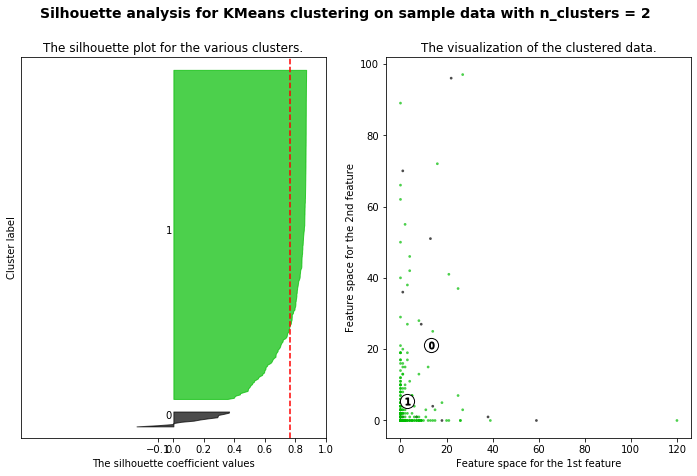

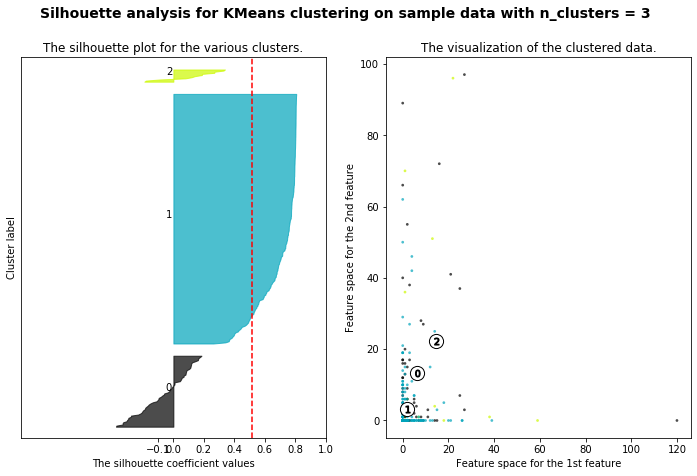

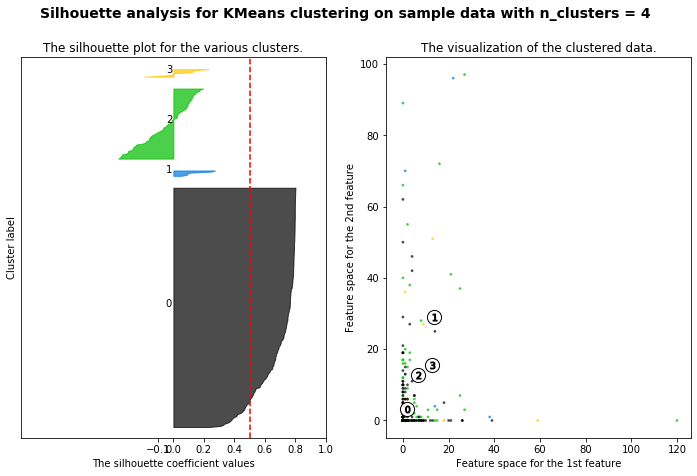

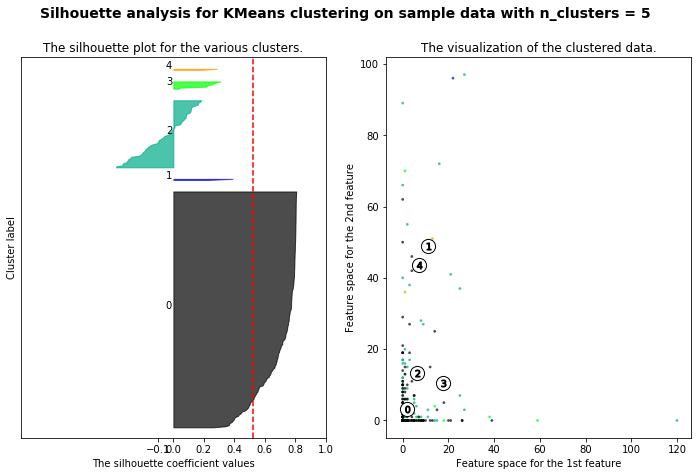

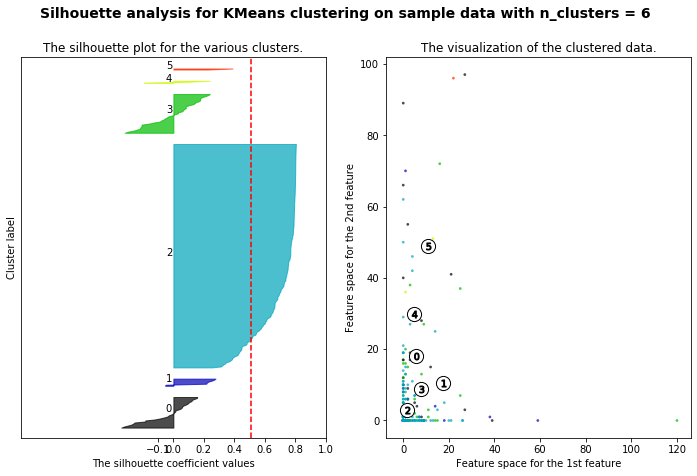

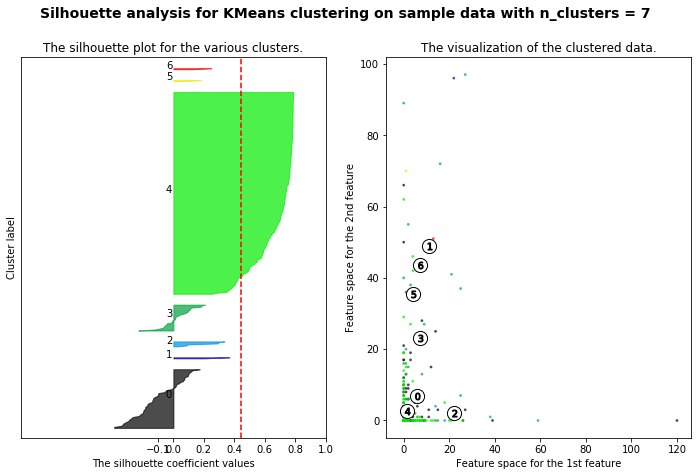

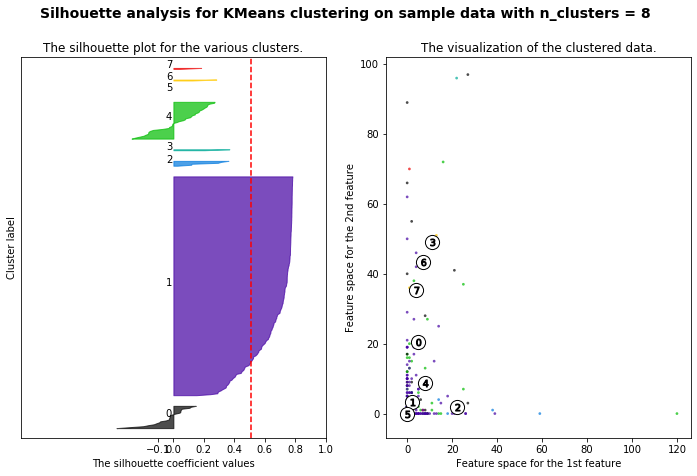

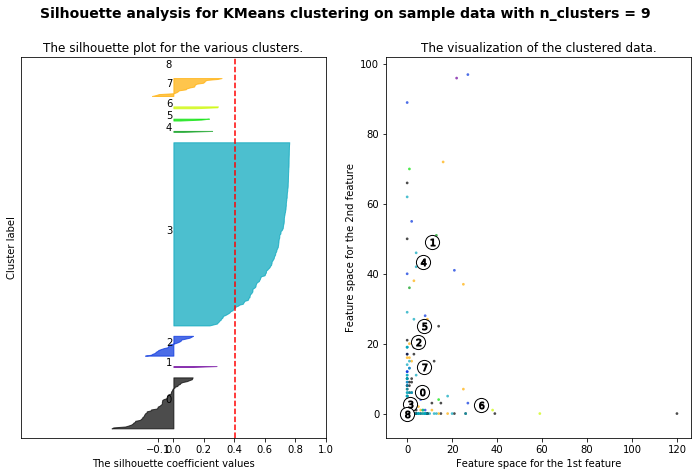

In [391]:
# run cluster
for n_clusters in range(2,10):
    # fit
    clusterer = KMeans(init='k-means++', n_clusters=n_clusters, n_init = 30, random_state=10) # set seed
    cluster_labels = clusterer.fit_predict(data_matrix)
    silhouette_avg = silhouette_score(data_matrix, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)    
    
    sample_silhouette_values = silhouette_samples(data_matrix, cluster_labels)
    
    #plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 7)
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(data_matrix) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_matrix[:, 0], data_matrix[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
    


In [395]:

scaler = preprocessing.MinMaxScaler()
scaler.fit(data_matrix)
scaler.transform(data_matrix)

array([[0.00833333, 0.13402062, 0.        , ..., 0.        , 0.        ,
        0.04938272],
       [0.10833333, 0.5257732 , 0.        , ..., 1.        , 0.13978495,
        0.52469136],
       [0.05      , 0.04123711, 0.6744186 , ..., 0.        , 0.02150538,
        0.0617284 ],
       ...,
       [0.01666667, 0.        , 0.        , ..., 0.        , 0.01075269,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [408]:
data_matrix + 1

array([[ 2, 14,  1, ...,  1,  1,  9],
       [14, 52,  1, ..., 68, 14, 86],
       [ 7,  5, 30, ...,  1,  3, 11],
       ...,
       [ 3,  1,  1, ...,  1,  2,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1]], dtype=int64)

In [409]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
pt.fit_transform(data_matrix + 1)


array([[0.5212824 , 1.24652323, 0.        , ..., 0.        , 0.        ,
        0.88587675],
       [1.03787072, 1.39903011, 0.        , ..., 0.94020294, 0.42443768,
        0.98400259],
       [0.94108814, 0.98963962, 0.63904541, ..., 0.        , 0.39317187,
        0.90586281],
       ...,
       [0.70900037, 0.        , 0.        , ..., 0.        , 0.34195137,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

For n_clusters = 2 The average silhouette_score is : 0.3505008674780617
For n_clusters = 3 The average silhouette_score is : 0.24394046834623728
For n_clusters = 4 The average silhouette_score is : 0.16663214585142297
For n_clusters = 5 The average silhouette_score is : 0.16587917324616333
For n_clusters = 6 The average silhouette_score is : 0.1617191629600166
For n_clusters = 7 The average silhouette_score is : 0.15595724703480768
For n_clusters = 8 The average silhouette_score is : 0.1467844249994868
For n_clusters = 9 The average silhouette_score is : 0.13285399823559318


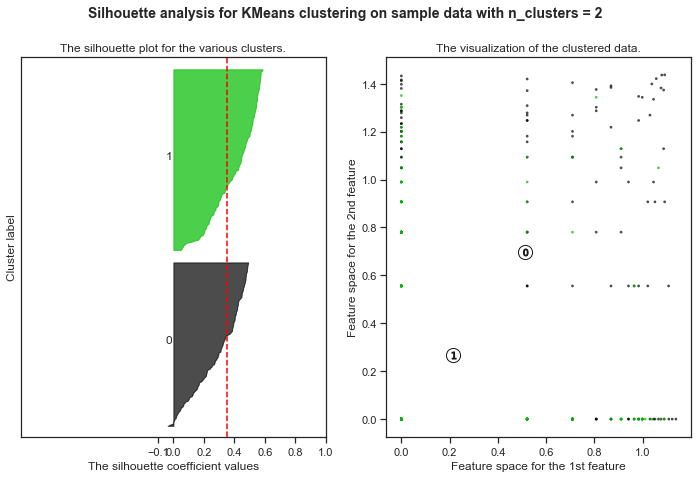

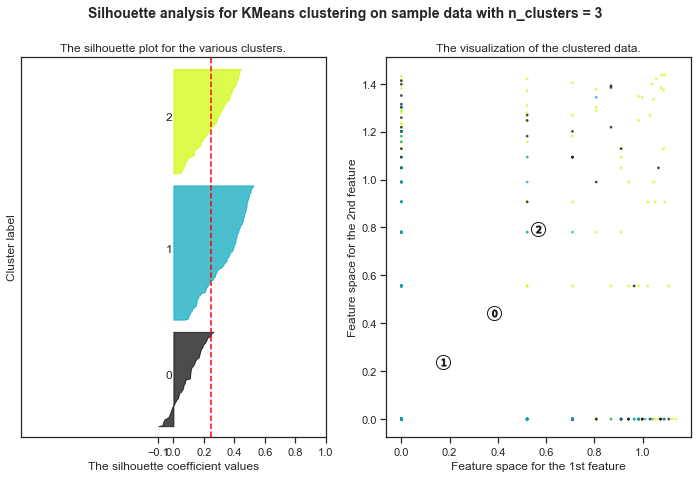

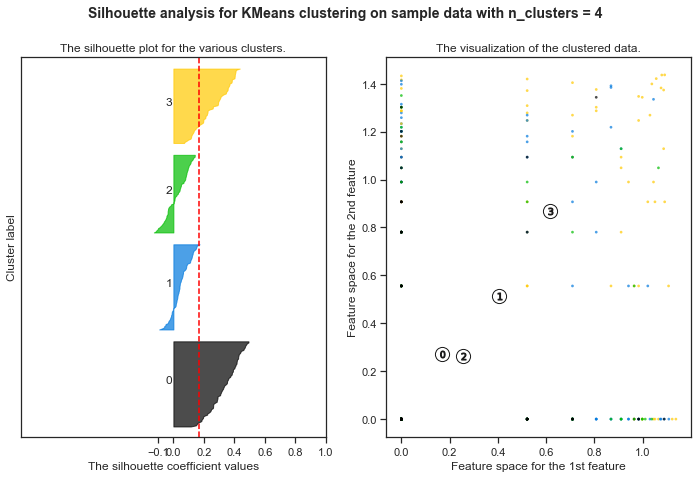

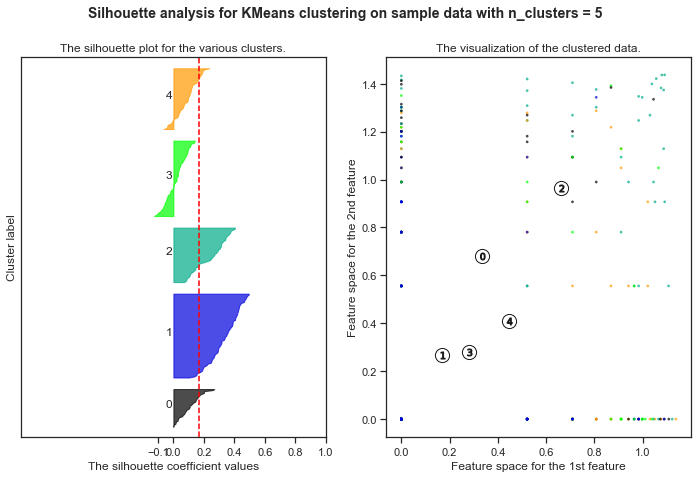

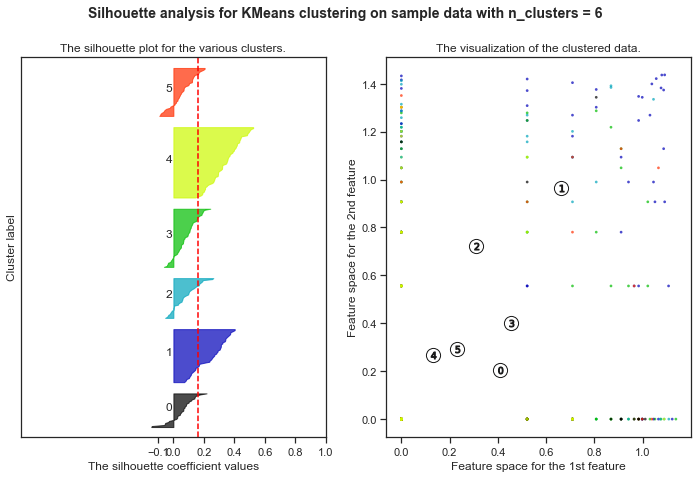

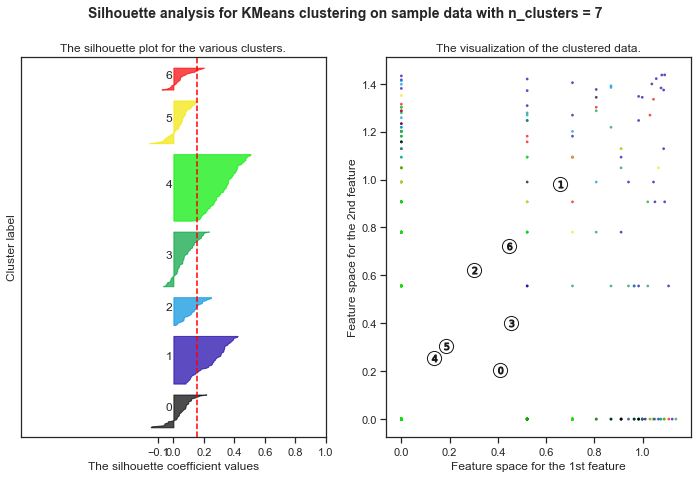

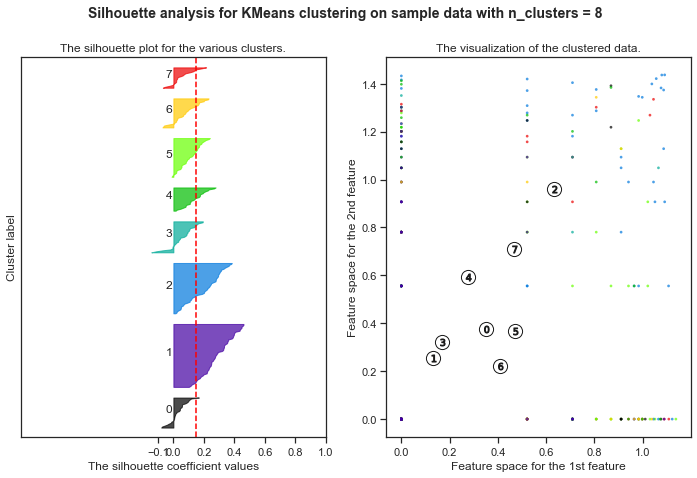

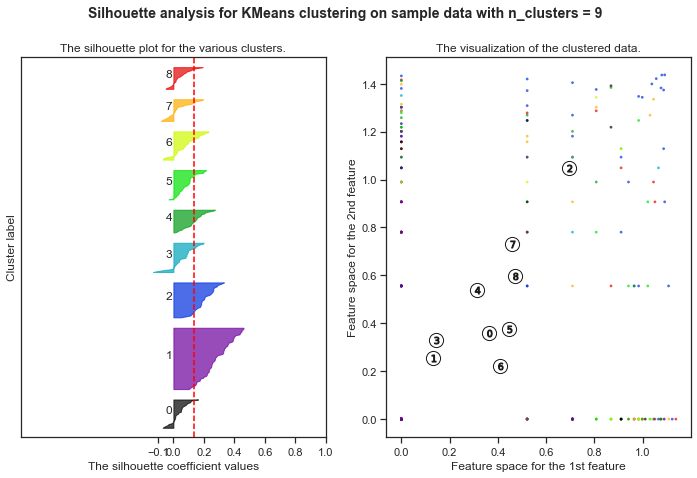

In [649]:
# transform data

# scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# scaler.fit(data_matrix)
# data_matrix = scaler.transform(data_matrix)
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
data_matrix = pt.fit_transform(data_matrix1 + 1)


# run cluster
for n_clusters in range(2,10):
    # fit
    clusterer = KMeans(init='k-means++', n_clusters=n_clusters, n_init = 100, random_state=10) # set seed
    cluster_labels = clusterer.fit_predict(data_matrix)
    silhouette_avg = silhouette_score(data_matrix, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)    
    
    sample_silhouette_values = silhouette_samples(data_matrix, cluster_labels)
    
    #plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 7)
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(data_matrix) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_matrix[:, 0], data_matrix[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
    


For n_clusters = 2 The average silhouette_score is : 0.3505008674780617
For n_clusters = 3 The average silhouette_score is : 0.24394046834623728
For n_clusters = 4 The average silhouette_score is : 0.16663214585142297
For n_clusters = 5 The average silhouette_score is : 0.16589360147860674
For n_clusters = 6 The average silhouette_score is : 0.16667178310008365
For n_clusters = 7 The average silhouette_score is : 0.16413491086834653
For n_clusters = 8 The average silhouette_score is : 0.13439984282880565
For n_clusters = 9 The average silhouette_score is : 0.1414009267520377


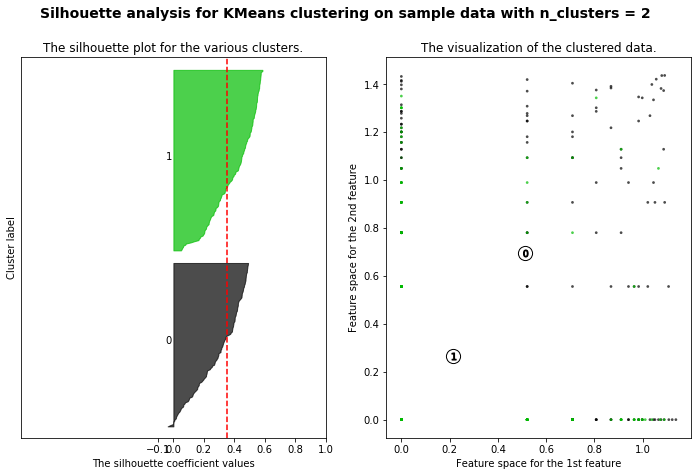

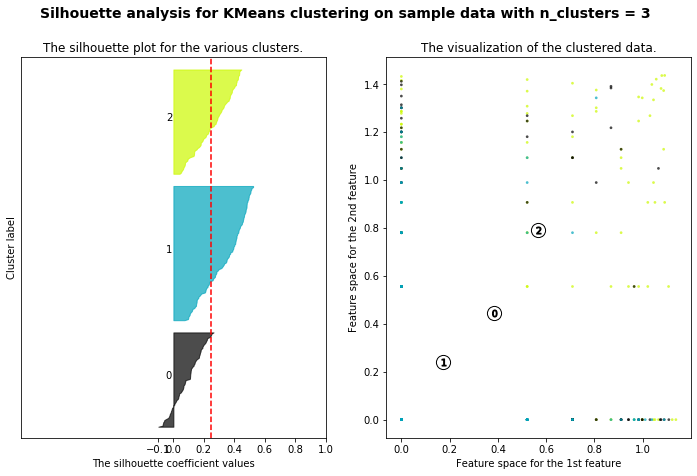

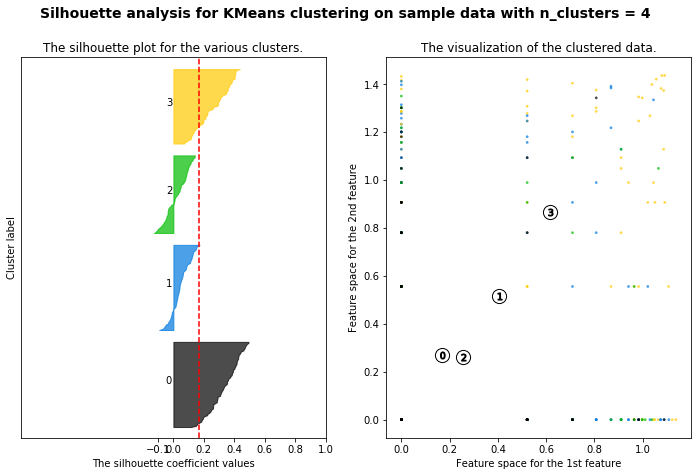

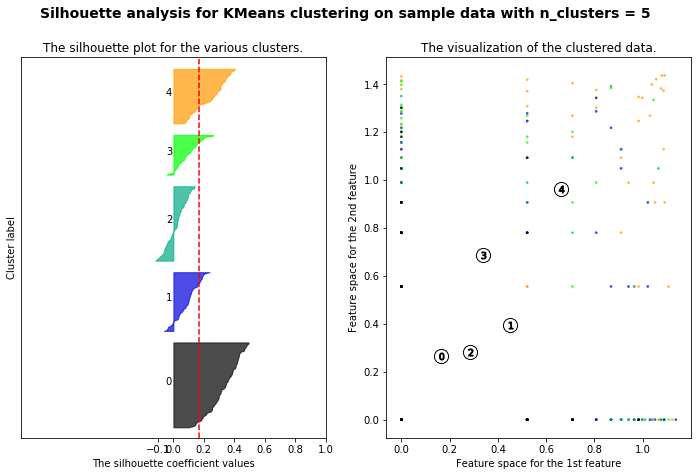

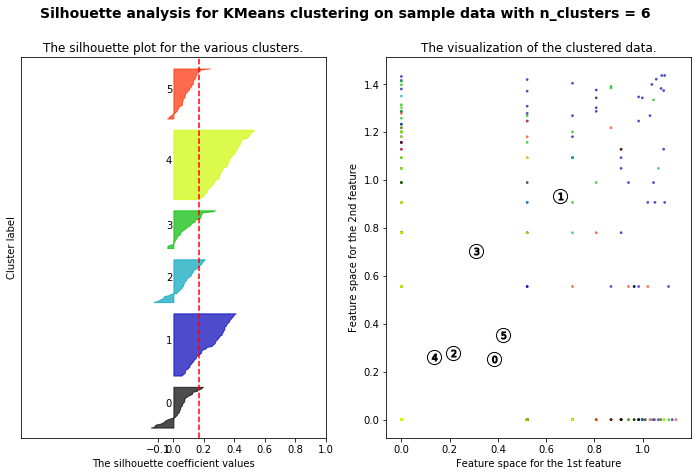

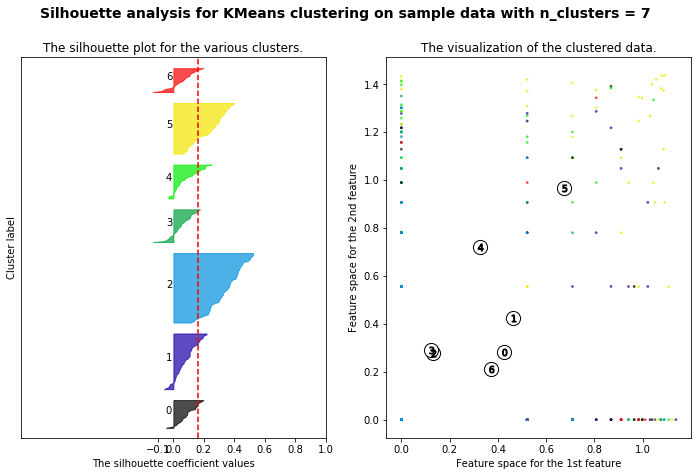

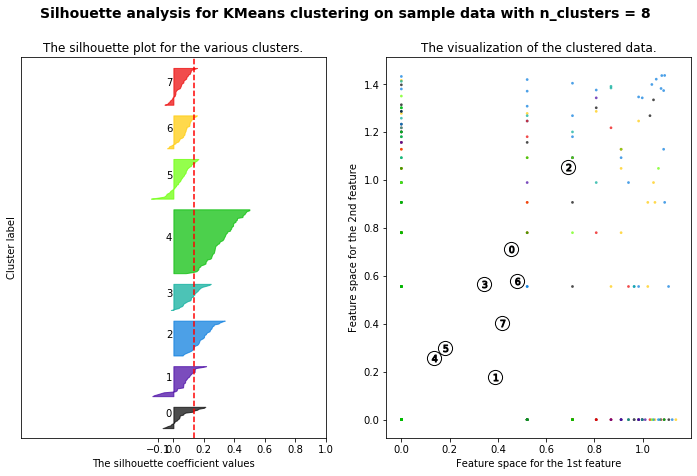

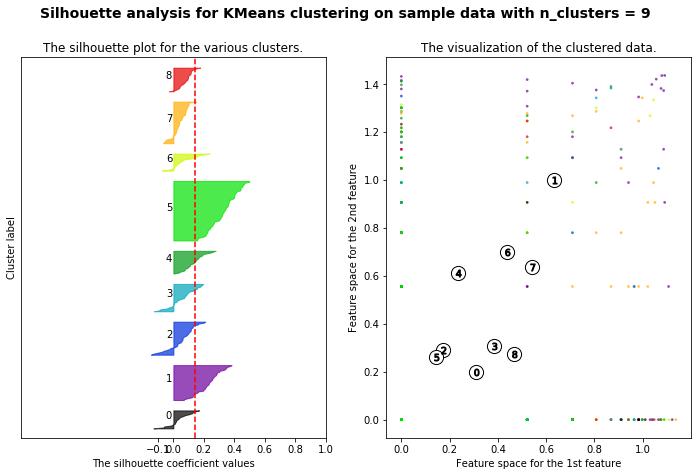

In [410]:
# transform data

# scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# scaler.fit(data_matrix)
# data_matrix = scaler.transform(data_matrix)
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
data_matrix = pt.fit_transform(data_matrix1 + 1)


# run cluster
for n_clusters in range(2,10):
    # fit
    clusterer = KMeans(init='k-means++', n_clusters=n_clusters, n_init = 30, random_state=10) # set seed
    cluster_labels = clusterer.fit_predict(data_matrix)
    silhouette_avg = silhouette_score(data_matrix, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)    
    
    sample_silhouette_values = silhouette_samples(data_matrix, cluster_labels)
    
    #plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 7)
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(data_matrix) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_matrix[:, 0], data_matrix[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
    


For n_clusters = 3 The average silhouette_score is : 0.204927407819612
                      1   0   2
number of customer  174  83  46
For n_clusters = 4 The average silhouette_score is : 0.17426680944748676
                      2   0   3   1
number of customer  158  69  41  35
For n_clusters = 5 The average silhouette_score is : 0.1186737959156038
                      0   4   3   1   2
number of customer  133  90  45  21  14
For n_clusters = 6 The average silhouette_score is : 0.1880654777870456
                      0   4   5   2   1  3
number of customer  163  65  39  21  14  1
For n_clusters = 7 The average silhouette_score is : 0.17241730836798583
                      6   1   0   2  3  5  4
number of customer  155  72  48  17  9  1  1
For n_clusters = 8 The average silhouette_score is : 0.23627991934959208
                      0   6   3   2   1  4  7  5
number of customer  185  51  37  16  10  2  1  1
For n_clusters = 9 The average silhouette_score is : 0.07000486125750105
   

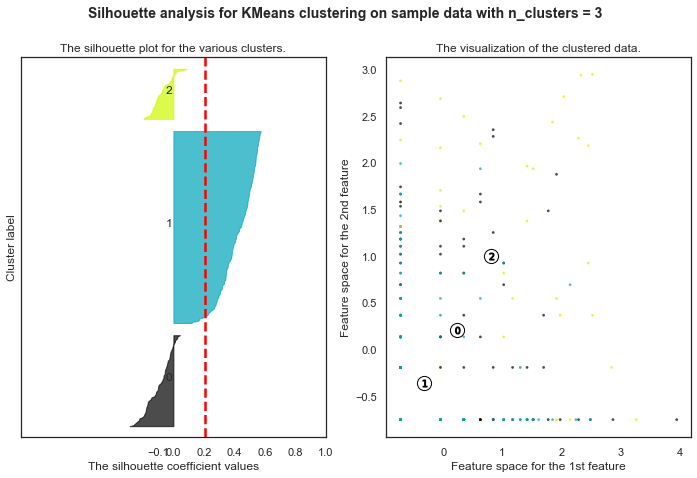

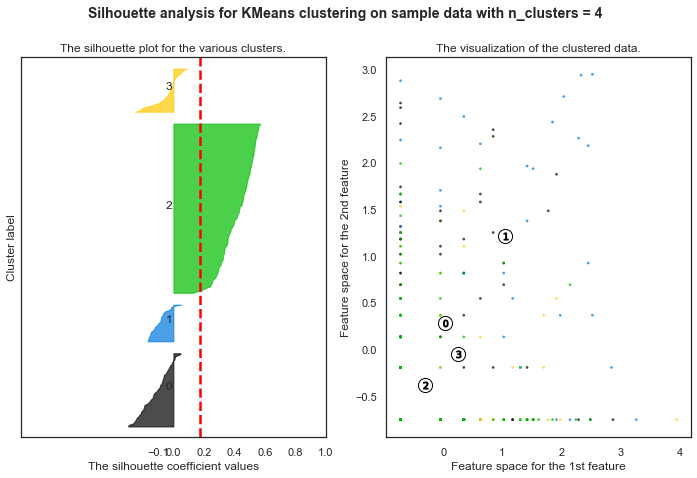

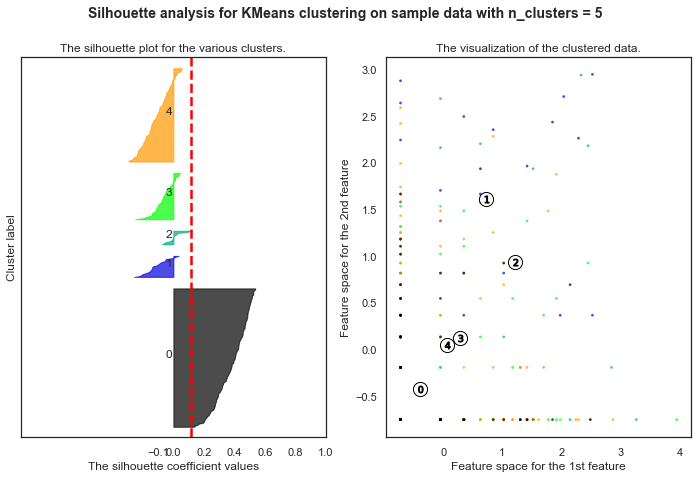

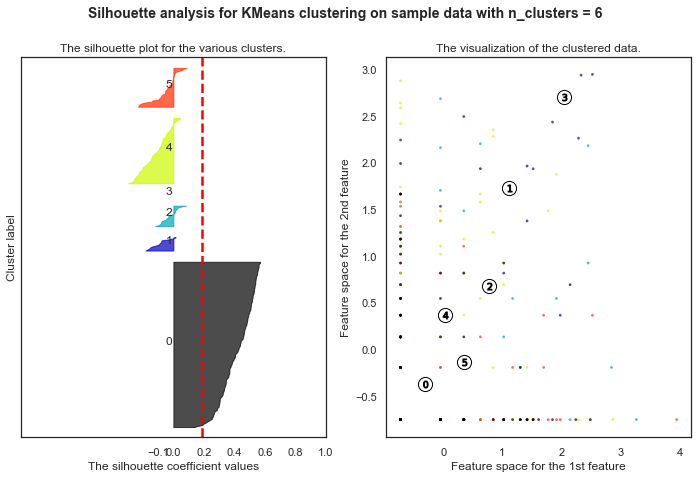

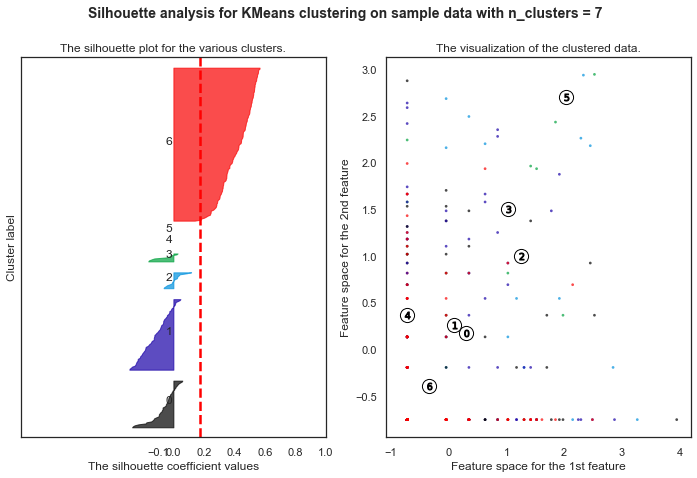

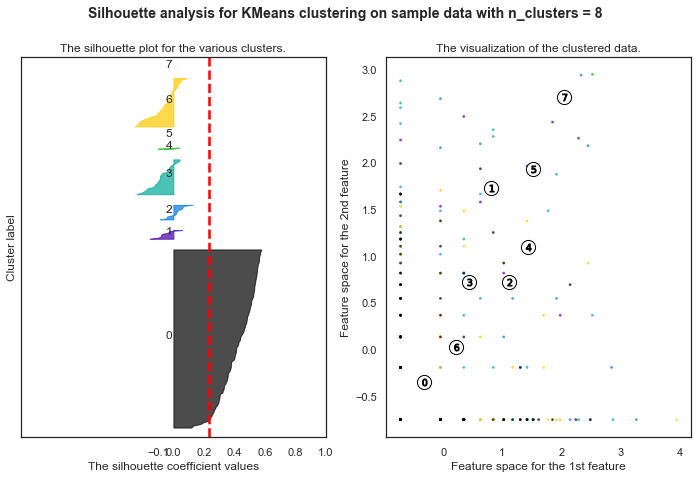

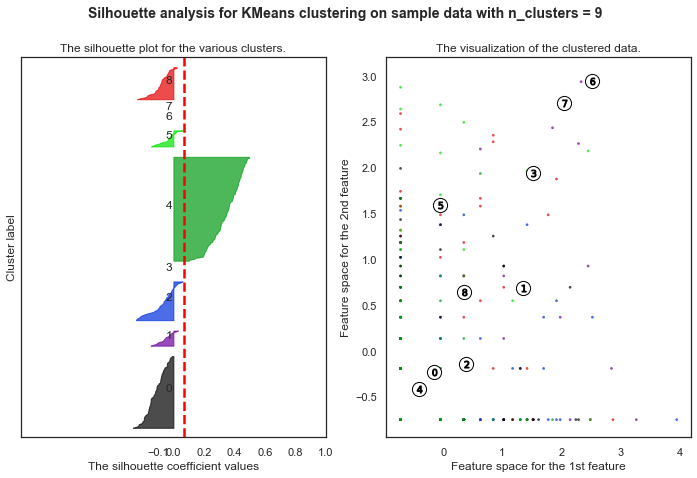

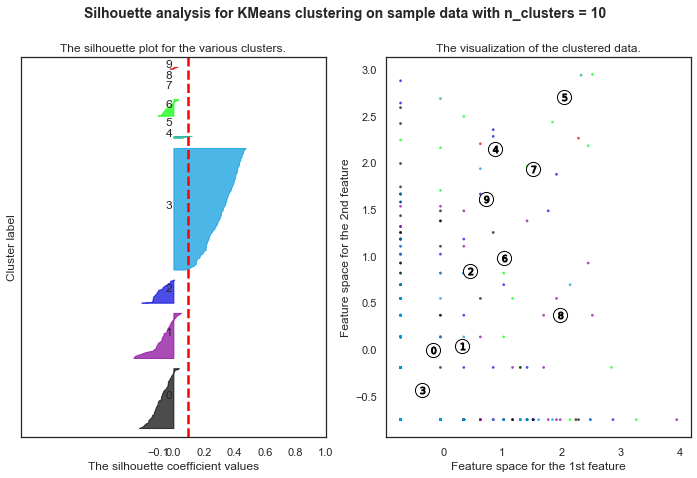

In [510]:
# transform data

# scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# scaler.fit(data_matrix)
# data_matrix = scaler.transform(data_matrix)
# pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
# data_matrix1 = pt.fit_transform(data_matrix + 1) # add 1 smoothing
# scaler = preprocessing.StandardScaler()
# scaler.fit(data_matrix1)
# print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
# data_matrix = scaler.transform(data_matrix1)

# data_matrix = preprocessing.normalize(data_matrix1, norm = 'l1')
data_matrix = np.log(data_matrix1 + 1)
scaler = preprocessing.StandardScaler()
scaler.fit(data_matrix)
# print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
data_matrix = scaler.transform(data_matrix)


# run cluster
for n_clusters in range(3,11):
    # fit
    clusterer = KMeans(init='k-means++', n_clusters=n_clusters, n_init = 100, random_state=10) # set seed
    cluster_labels = clusterer.fit_predict(data_matrix)
    silhouette_avg = silhouette_score(data_matrix, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)    
    
    sample_silhouette_values = silhouette_samples(data_matrix, cluster_labels)
    print(pd.DataFrame(pd.Series(cluster_labels).value_counts(), columns = ['number of customer']).T)    
    
    #plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 7)
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(data_matrix) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_matrix[:, 0], data_matrix[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
    


For n_clusters = 3 The average silhouette_score is : 0.2141622603373004
                      2   0   1
number of customer  162  88  53
For n_clusters = 4 The average silhouette_score is : 0.19848224963663832
                      0   2   3   1
number of customer  156  65  44  38
For n_clusters = 5 The average silhouette_score is : 0.13710164490943963
                      4   0   3   2   1
number of customer  130  68  38  34  33
For n_clusters = 6 The average silhouette_score is : 0.13075990795576622
                      1   0   3   4   2   5
number of customer  128  65  42  30  22  16
For n_clusters = 7 The average silhouette_score is : 0.13336135932189294
                      4   0   1   6   5   2   3
number of customer  122  49  33  31  29  21  18
For n_clusters = 8 The average silhouette_score is : 0.14682662843403455
                      5   0   6   3   7   2   4   1
number of customer  131  50  29  25  21  19  14  14
For n_clusters = 9 The average silhouette_score is : 0.1331

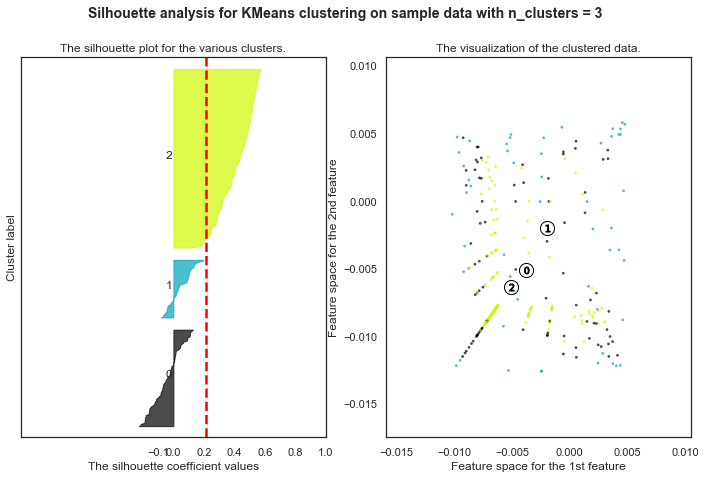

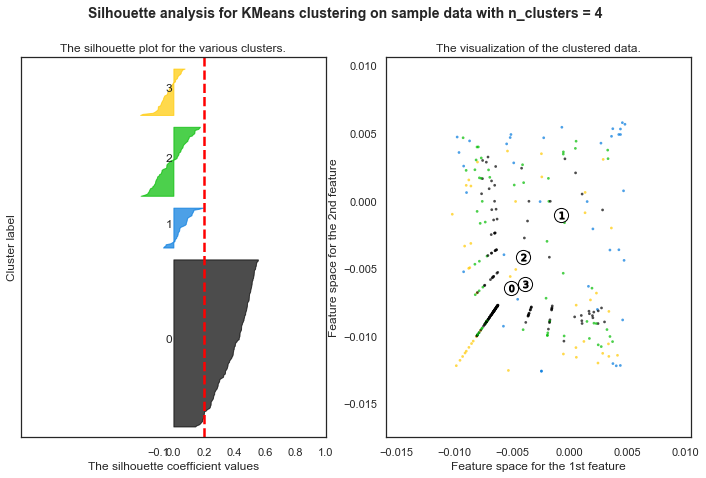

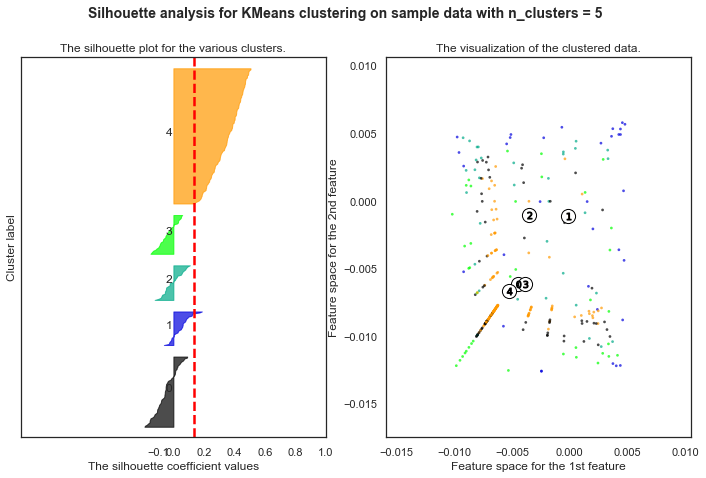

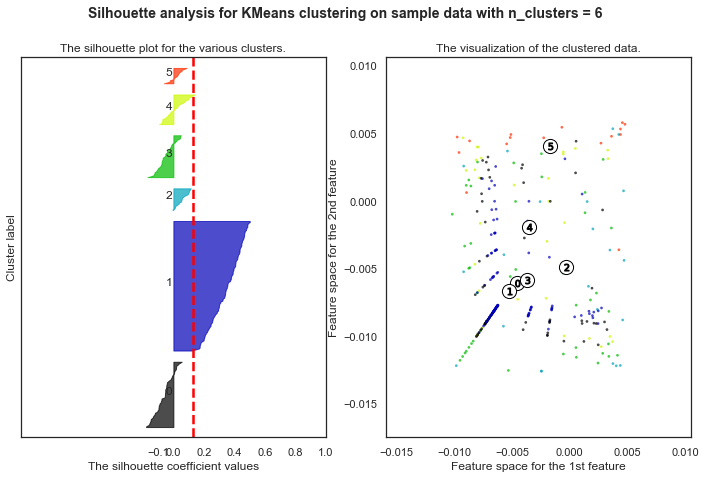

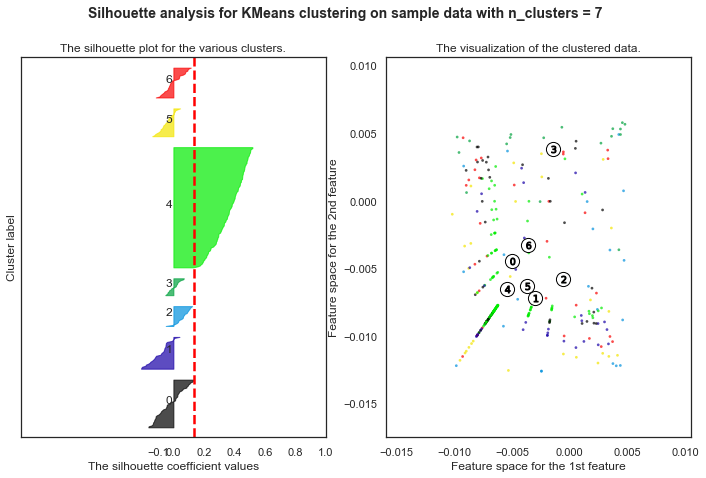

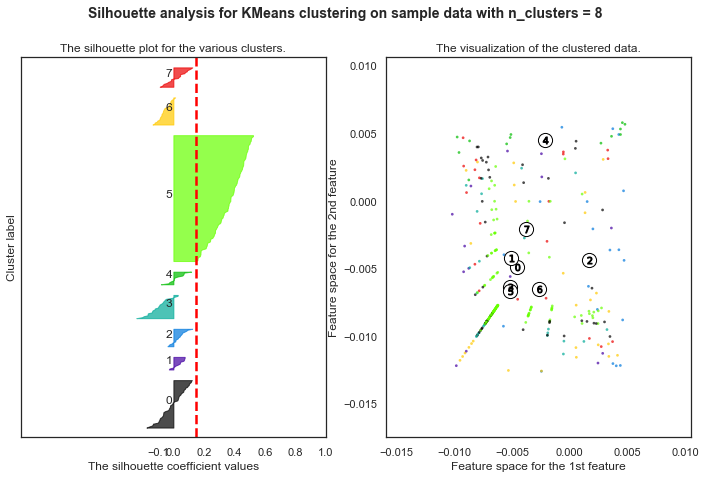

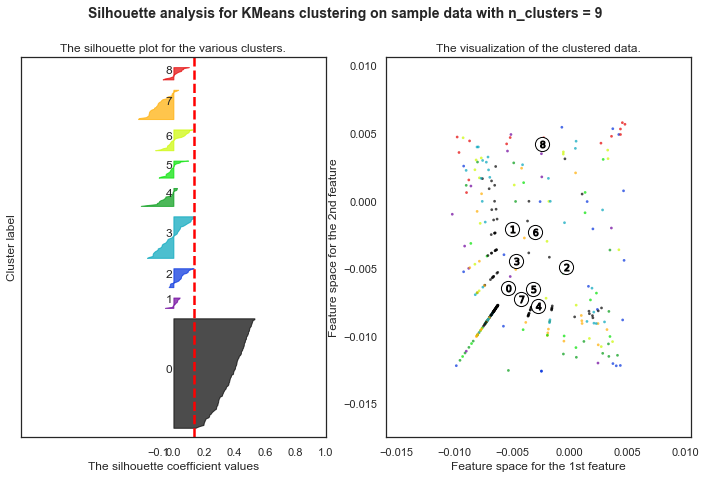

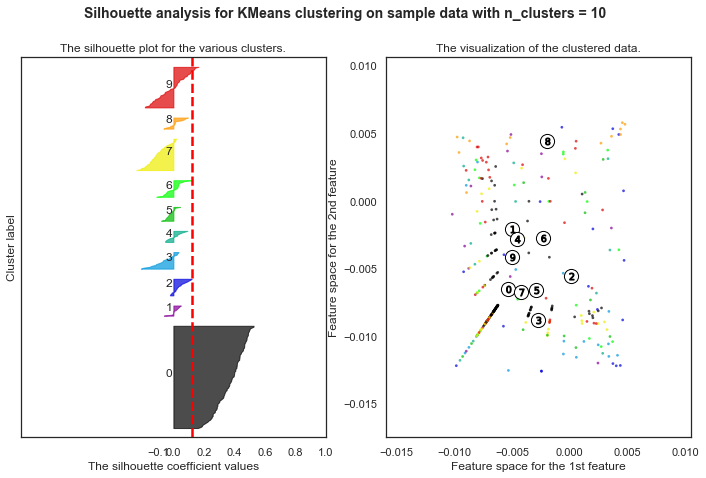

In [431]:
# transform data

# scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# scaler.fit(data_matrix)
# data_matrix = scaler.transform(data_matrix)
# pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
# data_matrix1 = pt.fit_transform(data_matrix + 1) # add 1 smoothing
scaler = preprocessing.StandardScaler()
scaler.fit(data_matrix1)
# print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
# data_matrix = scaler.transform(data_matrix1)
data_matrix = preprocessing.normalize(data_matrix1, norm = 'l1')



# run cluster
for n_clusters in range(3,11):
    # fit
    clusterer = KMeans(init='k-means++', n_clusters=n_clusters, n_init = 100, random_state=10) # set seed
    cluster_labels = clusterer.fit_predict(data_matrix)
    silhouette_avg = silhouette_score(data_matrix, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)    
    
    sample_silhouette_values = silhouette_samples(data_matrix, cluster_labels)
    print(pd.DataFrame(pd.Series(cluster_labels).value_counts(), columns = ['number of customer']).T)    
    
    #plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 7)
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(data_matrix) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_matrix[:, 0], data_matrix[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
    


In [425]:
# data_matrix1 = 
scaler = preprocessing.StandardScaler()
scaler.fit(data_matrix1)
# print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
data_matrix = scaler.transform(data_matrix1)

In [427]:
pca = PCA(n_components=6)
matrix_3D = pca.fit_transform(data_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(cluster_labels)

C:\Users\RICHARD IRVING\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


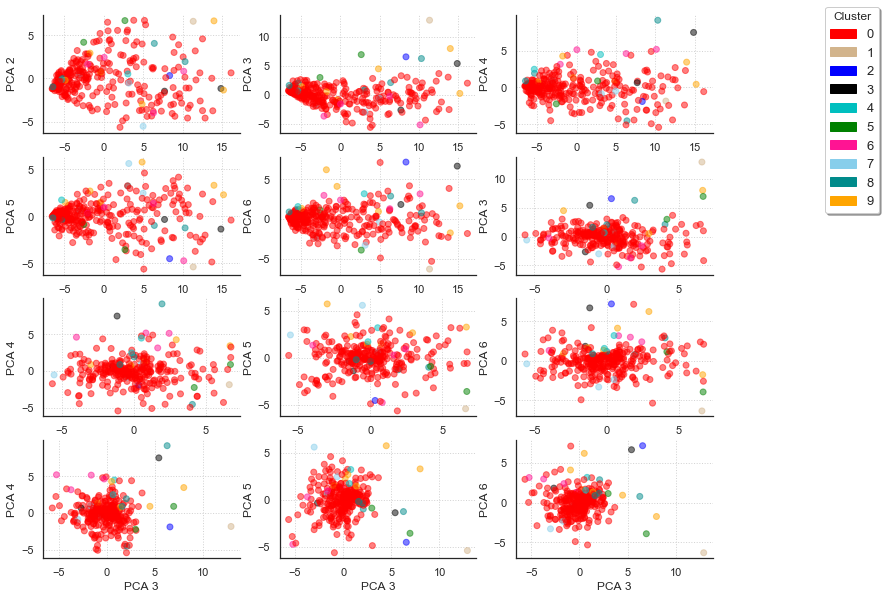

In [428]:
# plot PCA
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan',
                   9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', 
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure) #facecolor = 'lightgrey',

plt.tight_layout()

In [465]:

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [484]:
try2.describe()

,sales_customer,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Beverages count,DairyAndChilled count,FoodCommodity count,FoodImpulse count,FreshProduce count,Frozen count,Health count,HomeOutdoor count,Household count,MeatSeafood count,PetCare count
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,349.508251,3.448845,6.072607,2.026403,4.524752,18.706271,21.828383,24.168317,15.448845,25.036304,9.729373,3.161716,3.303630,21.570957,4.795380,1.194719
std,207.046110,9.589411,14.620180,5.683655,7.087337,25.735593,48.901546,35.345242,32.315137,67.334900,19.873758,5.205409,6.792591,27.984754,19.818156,6.621636
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,173.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,350.000000,0.000000,0.000000,0.000000,2.000000,11.000000,3.000000,8.000000,4.000000,0.000000,2.000000,1.000000,0.000000,12.000000,0.000000,0.000000
75%,527.500000,2.000000,5.000000,1.000000,6.000000,23.000000,24.000000,34.500000,14.000000,18.000000,11.000000,4.000000,4.000000,31.000000,2.000000,0.000000
max,728.000000,120.000000,97.000000,43.000000,45.000000,206.000000,401.000000,213.000000,259.000000,504.000000,195.000000,33.000000,60.000000,165.000000,273.000000,79.000000


In [479]:
data_matrix2 = np.array(try2.iloc[:,1:].values)


In [572]:
try1.describe()

,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Beverages count,DairyAndChilled count,FoodCommodity count,FoodImpulse count,FreshProduce count,Frozen count,...,Stationery count,Tofu count,ToysLearning count,TravelAndGiftSets count,TropicalFruits count,UHTMilkMilkPowder count,VegetablesFruits count,Water count,Wine count,Yoghurt count
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,3.448845,6.072607,2.026403,4.524752,18.706271,21.828383,24.168317,15.448845,25.036304,9.729373,...,0.359736,1.122112,0.188119,0.006601,0.973597,3.118812,1.102310,3.174917,1.623762,4.419142
std,9.589411,14.620180,5.683655,7.087337,25.735593,48.901546,35.345242,32.315137,67.334900,19.873758,...,1.598622,4.446325,1.199168,0.081110,3.030632,11.008384,3.216178,7.534848,6.721791,13.895515
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,11.000000,3.000000,8.000000,4.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,5.000000,1.000000,6.000000,23.000000,24.000000,34.500000,14.000000,18.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
max,120.000000,97.000000,43.000000,45.000000,206.000000,401.000000,213.000000,259.000000,504.000000,195.000000,...,17.000000,32.000000,15.000000,1.000000,25.000000,168.000000,36.000000,67.000000,93.000000,162.000000


In [ ]:
df != pd.Series([100, 250], index=["cost", "revenue"])

In [573]:
try1 == 0

,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Beverages count,DairyAndChilled count,FoodCommodity count,FoodImpulse count,FreshProduce count,Frozen count,...,Stationery count,Tofu count,ToysLearning count,TravelAndGiftSets count,TropicalFruits count,UHTMilkMilkPowder count,VegetablesFruits count,Water count,Wine count,Yoghurt count
sales_customer,,,,,,,,,,,,,,,,,,,,,
569,False,False,True,False,False,False,False,False,False,False,...,True,True,False,True,False,False,False,True,True,False
358,False,False,True,False,False,False,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,False,True,True,False,False
689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
521,True,False,True,True,False,False,False,True,False,False,...,True,True,True,True,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
679,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
227,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,True


In [575]:
try1.describe()

,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Beverages count,DairyAndChilled count,FoodCommodity count,FoodImpulse count,FreshProduce count,Frozen count,...,Stationery count,Tofu count,ToysLearning count,TravelAndGiftSets count,TropicalFruits count,UHTMilkMilkPowder count,VegetablesFruits count,Water count,Wine count,Yoghurt count
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,3.448845,6.072607,2.026403,4.524752,18.706271,21.828383,24.168317,15.448845,25.036304,9.729373,...,0.359736,1.122112,0.188119,0.006601,0.973597,3.118812,1.102310,3.174917,1.623762,4.419142
std,9.589411,14.620180,5.683655,7.087337,25.735593,48.901546,35.345242,32.315137,67.334900,19.873758,...,1.598622,4.446325,1.199168,0.081110,3.030632,11.008384,3.216178,7.534848,6.721791,13.895515
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,11.000000,3.000000,8.000000,4.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,5.000000,1.000000,6.000000,23.000000,24.000000,34.500000,14.000000,18.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
max,120.000000,97.000000,43.000000,45.000000,206.000000,401.000000,213.000000,259.000000,504.000000,195.000000,...,17.000000,32.000000,15.000000,1.000000,25.000000,168.000000,36.000000,67.000000,93.000000,162.000000


In [574]:
try1[try1 == 0].dropna()

,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Beverages count,DairyAndChilled count,FoodCommodity count,FoodImpulse count,FreshProduce count,Frozen count,...,Stationery count,Tofu count,ToysLearning count,TravelAndGiftSets count,TropicalFruits count,UHTMilkMilkPowder count,VegetablesFruits count,Water count,Wine count,Yoghurt count
sales_customer,,,,,,,,,,,,,,,,,,,,,


In [562]:
# remove outliers
try3 = try1[try1 != try1.describe().loc['max',:]].dropna().copy()

In [571]:
try3

,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Beverages count,DairyAndChilled count,FoodCommodity count,FoodImpulse count,FreshProduce count,Frozen count,...,Stationery count,Tofu count,ToysLearning count,TravelAndGiftSets count,TropicalFruits count,UHTMilkMilkPowder count,VegetablesFruits count,Water count,Wine count,Yoghurt count
sales_customer,,,,,,,,,,,,,,,,,,,,,
521,0.0,29.0,0.0,0.0,2.0,1.0,7.0,0.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
122,0.0,0.0,0.0,5.0,14.0,28.0,13.0,6.0,38.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,0.0,0.0
406,11.0,3.0,4.0,8.0,12.0,36.0,53.0,6.0,46.0,26.0,...,0.0,1.0,0.0,0.0,0.0,5.0,1.0,0.0,6.0,3.0
44,0.0,0.0,1.0,0.0,1.0,5.0,3.0,3.0,10.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
620,0.0,2.0,3.0,0.0,39.0,31.0,75.0,5.0,166.0,37.0,...,0.0,12.0,0.0,0.0,7.0,23.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
679,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [505]:
data_matrix3

array([[0.69314718, 2.63905733, 0.        , ..., 4.34380542, 1.60943791,
        0.        ],
       [2.63905733, 3.95124372, 0.        , ..., 5.0369526 , 0.        ,
        0.        ],
       [1.94591015, 1.60943791, 3.40119738, ..., 4.39444915, 3.09104245,
        0.        ],
       ...,
       [1.09861229, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [536]:
try1.ix[:, ~]

,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Beverages count,DairyAndChilled count,FoodCommodity count,FoodImpulse count,FreshProduce count,Frozen count,...,Stationery count,Tofu count,ToysLearning count,TravelAndGiftSets count,TropicalFruits count,UHTMilkMilkPowder count,VegetablesFruits count,Water count,Wine count,Yoghurt count
sales_customer,,,,,,,,,,,,,,,,,,,,,
569,1,13,0,16,3,54,44,28,29,41,...,0,0,2,0,3,2,14,0,0,8
358,13,51,0,33,140,375,132,165,27,25,...,11,0,1,0,1,5,0,67,13,85
204,6,4,29,21,57,31,95,68,24,32,...,0,4,0,0,0,20,0,0,2,10
689,27,97,2,45,38,111,52,55,17,39,...,1,25,1,0,3,2,3,1,17,19
521,0,29,0,0,2,1,7,0,6,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
679,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
227,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [567]:
try3.describe()

,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Beverages count,DairyAndChilled count,FoodCommodity count,FoodImpulse count,FreshProduce count,Frozen count,...,Stationery count,Tofu count,ToysLearning count,TravelAndGiftSets count,TropicalFruits count,UHTMilkMilkPowder count,VegetablesFruits count,Water count,Wine count,Yoghurt count
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,...,238.000000,238.000000,238.000000,238.0,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,2.058824,3.357143,1.100840,2.592437,12.596639,10.453782,14.403361,8.042017,11.546218,5.722689,...,0.176471,0.504202,0.016807,0.0,0.474790,1.865546,0.672269,2.243697,0.844538,1.823529
std,4.451888,8.095069,3.455308,4.204411,16.386585,20.150174,21.864106,16.851245,27.997061,10.481991,...,1.003345,2.012090,0.158218,0.0,1.754258,4.117318,2.097253,4.813775,2.841263,5.888768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,7.000000,2.000000,5.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,3.000000,0.750000,4.000000,16.000000,10.750000,18.000000,7.000000,6.000000,6.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,1.750000,0.000000,2.000000,0.000000,1.000000
max,26.000000,62.000000,31.000000,27.000000,122.000000,126.000000,141.000000,142.000000,212.000000,73.000000,...,13.000000,17.000000,2.000000,0.0,14.000000,31.000000,17.000000,27.000000,24.000000,52.000000


In [563]:
data_matrix3 = np.array(try3.values)

In [638]:
data_matrix1 + try1.describe().loc['mean',:].values*20

array([[ 69.97689769, 134.45214521,  40.52805281, ...,  63.49834983,
         32.47524752,  96.38283828],
       [ 81.97689769, 172.45214521,  40.52805281, ..., 130.49834983,
         45.47524752, 173.38283828],
       [ 74.97689769, 125.45214521,  69.52805281, ...,  63.49834983,
         34.47524752,  98.38283828],
       ...,
       [ 70.97689769, 121.45214521,  40.52805281, ...,  63.49834983,
         33.47524752,  88.38283828],
       [ 68.97689769, 121.45214521,  40.52805281, ...,  63.49834983,
         32.47524752,  88.38283828],
       [ 68.97689769, 121.45214521,  40.52805281, ...,  63.49834983,
         32.47524752,  88.38283828]])

In [642]:
data_matrix4 = data_matrix1 + try1.describe().loc['mean',:].values*40

In [645]:
data_matrix4

array([[138.95379538, 255.90429043,  81.05610561, ..., 126.99669967,
         64.95049505, 184.76567657],
       [150.95379538, 293.90429043,  81.05610561, ..., 193.99669967,
         77.95049505, 261.76567657],
       [143.95379538, 246.90429043, 110.05610561, ..., 126.99669967,
         66.95049505, 186.76567657],
       ...,
       [139.95379538, 242.90429043,  81.05610561, ..., 126.99669967,
         65.95049505, 176.76567657],
       [137.95379538, 242.90429043,  81.05610561, ..., 126.99669967,
         64.95049505, 176.76567657],
       [137.95379538, 242.90429043,  81.05610561, ..., 126.99669967,
         64.95049505, 176.76567657]])

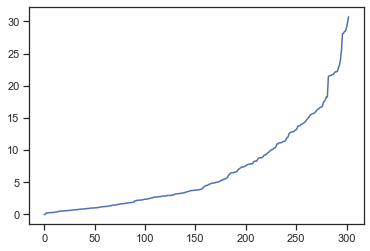

In [646]:
# scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# scaler.fit(data_matrix2)
X = StandardScaler().fit_transform(data_matrix4)
# X = scaler.transform(data_matrix2)
# X = data_matrix4
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Estimated number of clusters: 1
Estimated number of noise points: 21
Homogeneity: 0.044
Completeness: 1.000
V-measure: 0.084
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Silhouette Coefficient: 0.602


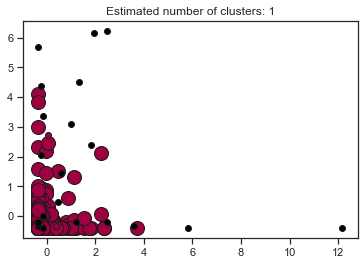

In [647]:
# try DBSCAN

# make_blobs




# #############################################################################
# # Generate sample data
# centers = [[1, 1], [-1, -1], [1, -1]]
# X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
#                             random_state=0)

# X = StandardScaler().fit_transform(data_matrix1)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=20, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

labels_true = np.array(try1.index.values)
# labels_true = np.array(try3.iloc[:,0].values)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [514]:
try1

,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Beverages count,DairyAndChilled count,FoodCommodity count,FoodImpulse count,FreshProduce count,Frozen count,...,Stationery count,Tofu count,ToysLearning count,TravelAndGiftSets count,TropicalFruits count,UHTMilkMilkPowder count,VegetablesFruits count,Water count,Wine count,Yoghurt count
sales_customer,,,,,,,,,,,,,,,,,,,,,
569,1,13,0,16,3,54,44,28,29,41,...,0,0,2,0,3,2,14,0,0,8
358,13,51,0,33,140,375,132,165,27,25,...,11,0,1,0,1,5,0,67,13,85
204,6,4,29,21,57,31,95,68,24,32,...,0,4,0,0,0,20,0,0,2,10
689,27,97,2,45,38,111,52,55,17,39,...,1,25,1,0,3,2,3,1,17,19
521,0,29,0,0,2,1,7,0,6,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
679,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
227,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [517]:
try1.columns

Index(['Alcohol count', 'BabyAndChild count', 'Bakery count', 'Beauty count',
       'Beverages count', 'DairyAndChilled count', 'FoodCommodity count',
       'FoodImpulse count', 'FreshProduce count', 'Frozen count',
       ...
       'Stationery count', 'Tofu count', 'ToysLearning count',
       'TravelAndGiftSets count', 'TropicalFruits count',
       'UHTMilkMilkPowder count', 'VegetablesFruits count', 'Water count',
       'Wine count', 'Yoghurt count'],
      dtype='object', length=121)

In [519]:
try1

,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Beverages count,DairyAndChilled count,FoodCommodity count,FoodImpulse count,FreshProduce count,Frozen count,...,Stationery count,Tofu count,ToysLearning count,TravelAndGiftSets count,TropicalFruits count,UHTMilkMilkPowder count,VegetablesFruits count,Water count,Wine count,Yoghurt count
sales_customer,,,,,,,,,,,,,,,,,,,,,
569,1,13,0,16,3,54,44,28,29,41,...,0,0,2,0,3,2,14,0,0,8
358,13,51,0,33,140,375,132,165,27,25,...,11,0,1,0,1,5,0,67,13,85
204,6,4,29,21,57,31,95,68,24,32,...,0,4,0,0,0,20,0,0,2,10
689,27,97,2,45,38,111,52,55,17,39,...,1,25,1,0,3,2,3,1,17,19
521,0,29,0,0,2,1,7,0,6,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
679,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
227,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


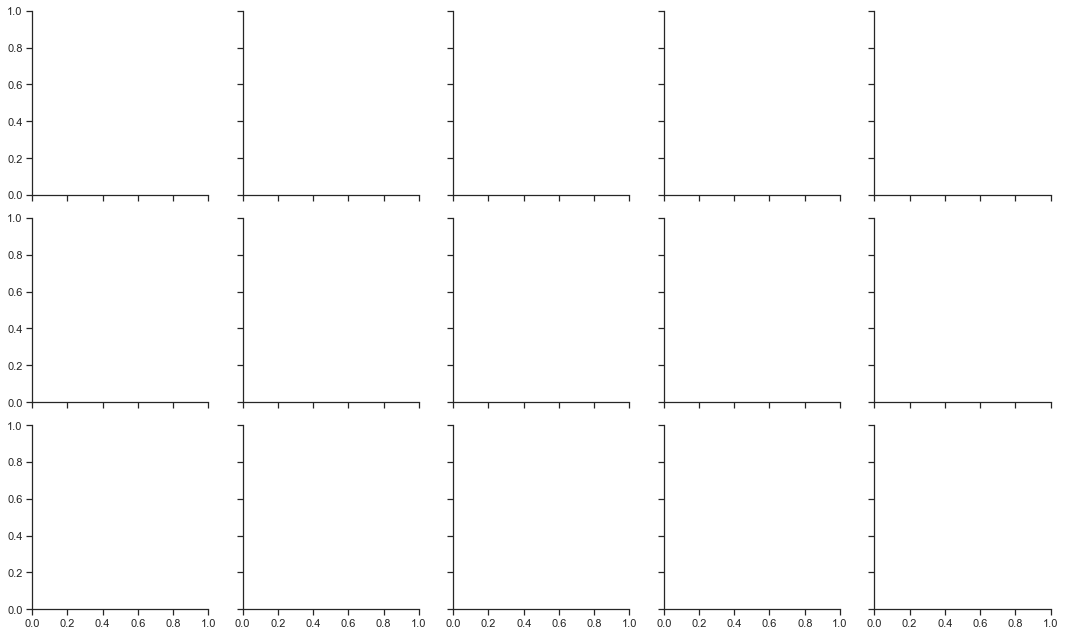

In [524]:
g = sns.FacetGrid(maindf1, col = 'product_lvl1_cat_desc', col_wrap = 5)


In [583]:
try1.iloc[1,:].values

array([ 13,  51,   0,  33, 140, 375, 132, 165,  27,  25,  14,  29, 153,
         0,   0,   0,   0,   0,   0,  12,   0,   0,  30,   2,   0,   0,
        22,   0,   2,  29,   0,   0,  27,   0, 146,   0,  56,   0,   3,
         0,  35,  12,  27,   1,   3,   2,   4,   7,  17,   0,   1,   8,
         0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         0,  11,   4,   0,  21,   0,   5,   9,  20,   2,   0,   1,   7,
         0,   5,  27,  22,   0,   0,   0,  18,   1, 119,   0,   0,   1,
        43,   0,   2,   0,  33,   2,  20,   0,   0,   5,   2,  13,   0,
         0,  79,  37,   9,   0,   8,   0,  11,   0,   1,   0,   1,   5,
         0,  67,  13,  85], dtype=int64)

In [596]:
3%3

0

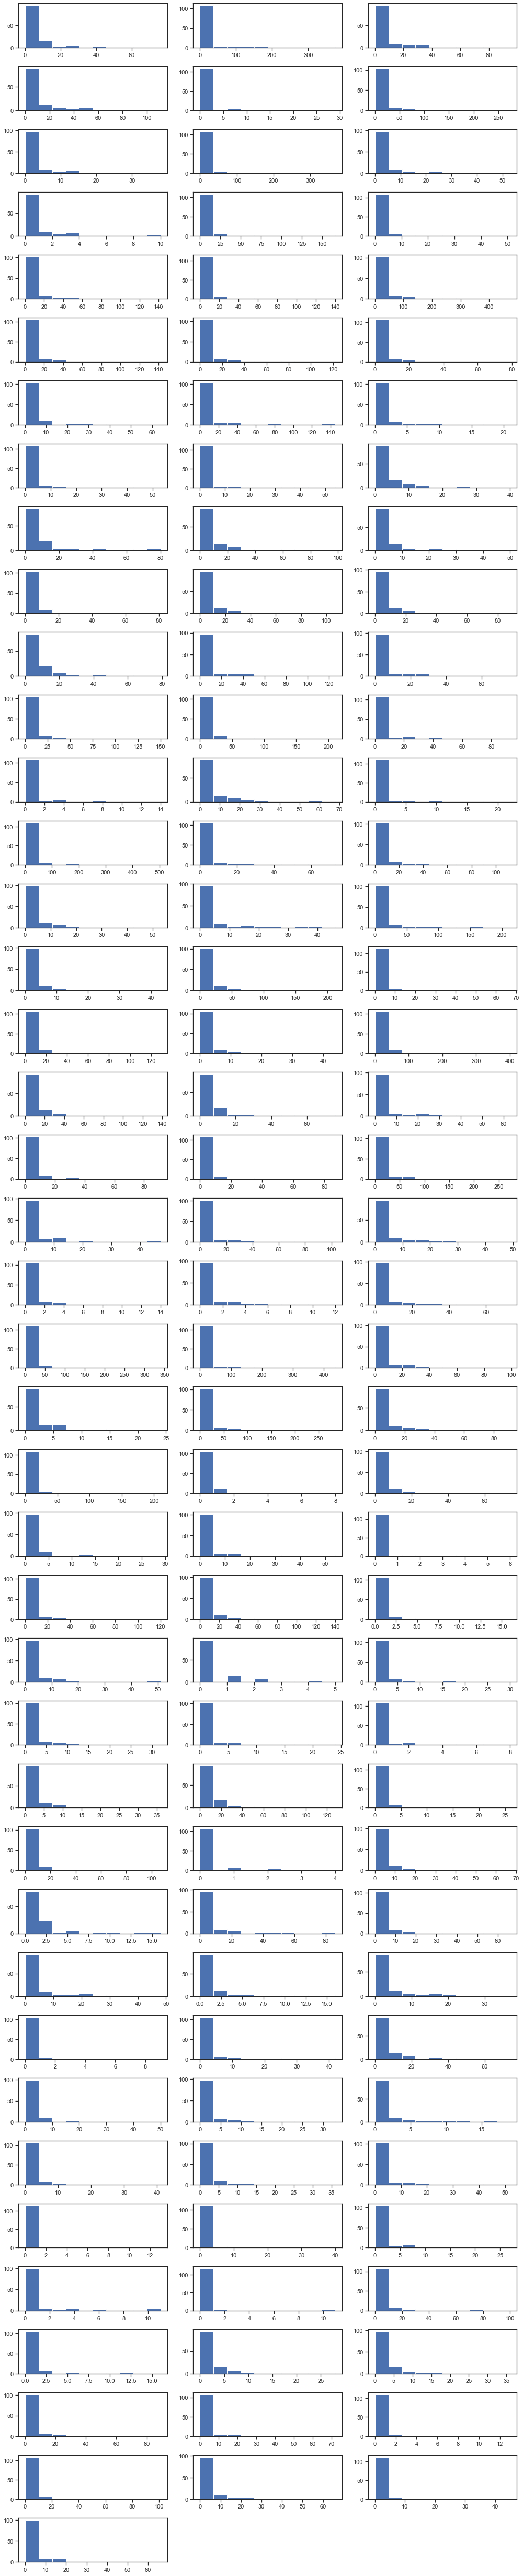

In [603]:
fig = plt.figure(figsize = (14,100))
# for i in range(1,len(try1.iloc[1,:].values)+2):
#     plt.subplot(60, 2,i)
#     plt.hist(list(try1.iloc[i-1,:].values))
    
# plt.show()



# fig = plt.figure()

for i in range(len(try1.iloc[1,:].values)):
    ax = fig.add_subplot(60,3,i+1)
    ax.hist(try1.iloc[i,:].values)
    
plt.tight_layout()
plt.show()

In [605]:
# add means to each count


try1.describe().loc['mean',:]

Alcohol count               3.448845
BabyAndChild count          6.072607
Bakery count                2.026403
Beauty count                4.524752
Beverages count            18.706271
                             ...    
UHTMilkMilkPowder count     3.118812
VegetablesFruits count      1.102310
Water count                 3.174917
Wine count                  1.623762
Yoghurt count               4.419142
Name: mean, Length: 121, dtype: float64

In [611]:
try1.describe().loc['mean',:].values

array([3.44884488e+00, 6.07260726e+00, 2.02640264e+00, 4.52475248e+00,
       1.87062706e+01, 2.18283828e+01, 2.41683168e+01, 1.54488449e+01,
       2.50363036e+01, 9.72937294e+00, 3.16171617e+00, 3.30363036e+00,
       2.15709571e+01, 4.79537954e+00, 1.19471947e+00, 6.66666667e-01,
       2.04620462e-01, 2.31023102e-02, 2.08910891e+00, 9.37293729e-01,
       4.09240924e-01, 5.11551155e-01, 1.71947195e+00, 7.59075908e-02,
       1.24092409e+00, 5.80858086e-01, 4.57755776e+00, 1.94059406e+00,
       7.49174917e-01, 4.03300330e+00, 4.95049505e-02, 3.63036304e-02,
       4.65346535e+00, 7.85478548e-01, 3.41914191e+00, 2.77227723e-01,
       5.72607261e+00, 2.64026403e-02, 1.09570957e+00, 6.93069307e-02,
       1.31353135e+00, 2.61716172e+00, 6.03960396e+00, 1.64026403e+00,
       1.25412541e-01, 1.09900990e+00, 3.10231023e-01, 1.86798680e+00,
       2.14191419e+00, 3.53135314e-01, 6.76567657e-01, 1.37953795e+00,
       3.30033003e-03, 3.82838284e-01, 6.60066007e-03, 3.75577558e+00,
      

In [610]:
try1.T + try1.describe().loc['mean',:].values

TypeError: 'numpy.ndarray' object is not callable

In [523]:
maindf1

,sales_customer,sales_date_id,product_lvl1_cat_desc,product_lvl2_cat_desc
0,569,2018-01-02,FoodCommodity,JarredFood
1,358,2018-02-01,FoodCommodity,JarredFood
2,358,2018-02-22,FoodCommodity,JarredFood
3,569,2018-02-28,FoodCommodity,JarredFood
4,358,2018-03-01,FoodCommodity,JarredFood
...,...,...,...,...
49995,358,2018-09-14,BabyAndChild,BabyPersonal
49996,11,2018-09-14,Frozen,Desserts
49997,11,2018-09-14,Frozen,Desserts
49998,396,2018-09-14,FoodCommodity,CookingSaucesAndKits


In [522]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
tips = sns.load_dataset("tips")
# g = sns.FacetGrid(tips, col="time", row="smoker")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
g = g.map(plt.hist, )

In [ ]:
try1.describe

In [493]:
try1

,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Beverages count,DairyAndChilled count,FoodCommodity count,FoodImpulse count,FreshProduce count,Frozen count,...,Stationery count,Tofu count,ToysLearning count,TravelAndGiftSets count,TropicalFruits count,UHTMilkMilkPowder count,VegetablesFruits count,Water count,Wine count,Yoghurt count
sales_customer,,,,,,,,,,,,,,,,,,,,,
569,1,13,0,16,3,54,44,28,29,41,...,0,0,2,0,3,2,14,0,0,8
358,13,51,0,33,140,375,132,165,27,25,...,11,0,1,0,1,5,0,67,13,85
204,6,4,29,21,57,31,95,68,24,32,...,0,4,0,0,0,20,0,0,2,10
689,27,97,2,45,38,111,52,55,17,39,...,1,25,1,0,3,2,3,1,17,19
521,0,29,0,0,2,1,7,0,6,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
679,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
227,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [501]:
try1.describe()

,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Beverages count,DairyAndChilled count,FoodCommodity count,FoodImpulse count,FreshProduce count,Frozen count,...,Stationery count,Tofu count,ToysLearning count,TravelAndGiftSets count,TropicalFruits count,UHTMilkMilkPowder count,VegetablesFruits count,Water count,Wine count,Yoghurt count
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,3.448845,6.072607,2.026403,4.524752,18.706271,21.828383,24.168317,15.448845,25.036304,9.729373,...,0.359736,1.122112,0.188119,0.006601,0.973597,3.118812,1.102310,3.174917,1.623762,4.419142
std,9.589411,14.620180,5.683655,7.087337,25.735593,48.901546,35.345242,32.315137,67.334900,19.873758,...,1.598622,4.446325,1.199168,0.081110,3.030632,11.008384,3.216178,7.534848,6.721791,13.895515
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,11.000000,3.000000,8.000000,4.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,5.000000,1.000000,6.000000,23.000000,24.000000,34.500000,14.000000,18.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
max,120.000000,97.000000,43.000000,45.000000,206.000000,401.000000,213.000000,259.000000,504.000000,195.000000,...,17.000000,32.000000,15.000000,1.000000,25.000000,168.000000,36.000000,67.000000,93.000000,162.000000


In [500]:
print(try1.describe().loc['max',:].values.shape)

print(try1.describe().loc['max',:].values < 200)

try1.ix[:, try1.describe().loc['max',:].values < 200]

# print(try1.describe().loc['min',:].values)

(121,)
[ True  True  True  True False False False False False  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True]


C:\Users\RICHARD IRVING\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Frozen count,Health count,HomeOutdoor count,Household count,PetCare count,AirCare count,...,Stationery count,Tofu count,ToysLearning count,TravelAndGiftSets count,TropicalFruits count,UHTMilkMilkPowder count,VegetablesFruits count,Water count,Wine count,Yoghurt count
sales_customer,,,,,,,,,,,,,,,,,,,,,
569,1,13,0,16,41,9,2,76,0,6,...,0,0,2,0,3,2,14,0,0,8
358,13,51,0,33,25,14,29,153,0,0,...,11,0,1,0,1,5,0,67,13,85
204,6,4,29,21,32,2,6,80,0,0,...,0,4,0,0,0,20,0,0,2,10
689,27,97,2,45,39,33,28,107,0,4,...,1,25,1,0,3,2,3,1,17,19
521,0,29,0,0,1,0,0,18,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
227,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [496]:
try1

,Alcohol count,BabyAndChild count,Bakery count,Beauty count,Beverages count,DairyAndChilled count,FoodCommodity count,FoodImpulse count,FreshProduce count,Frozen count,...,Stationery count,Tofu count,ToysLearning count,TravelAndGiftSets count,TropicalFruits count,UHTMilkMilkPowder count,VegetablesFruits count,Water count,Wine count,Yoghurt count
sales_customer,,,,,,,,,,,,,,,,,,,,,
569,1,13,0,16,3,54,44,28,29,41,...,0,0,2,0,3,2,14,0,0,8
358,13,51,0,33,140,375,132,165,27,25,...,11,0,1,0,1,5,0,67,13,85
204,6,4,29,21,57,31,95,68,24,32,...,0,4,0,0,0,20,0,0,2,10
689,27,97,2,45,38,111,52,55,17,39,...,1,25,1,0,3,2,3,1,17,19
521,0,29,0,0,2,1,7,0,6,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
679,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
227,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [318]:
maindf1

,sales_customer,sales_date_id,product_lvl1_cat_desc,product_lvl2_cat_desc
0,569,2018-01-02,FoodCommodity,JarredFood
1,358,2018-02-01,FoodCommodity,JarredFood
2,358,2018-02-22,FoodCommodity,JarredFood
3,569,2018-02-28,FoodCommodity,JarredFood
4,358,2018-03-01,FoodCommodity,JarredFood
...,...,...,...,...
49995,358,2018-09-14,BabyAndChild,BabyPersonal
49996,11,2018-09-14,Frozen,Desserts
49997,11,2018-09-14,Frozen,Desserts
49998,396,2018-09-14,FoodCommodity,CookingSaucesAndKits
